# **Ejercicio: Análisis y Visualización de Datos desde un CSV**

### Prof. Andrés Mena Abarca

**Objetivo:**  
Leer datos de un archivo CSV, realizar un análisis exploratorio y crear diferentes gráficos para visualizar la información utilizando Pandas y Matplotlib.

# Estudiante: Jafet Rojas Zamora

In [38]:
# Importar la biblioteca pandas, que se utiliza para manipular y analizar datos estructurados.
import pandas as pd

# Definir la ruta del archivo CSV que contiene los datos.
# Aquí se especifica el nombre del archivo (puede ser relativo o absoluto).
ruta_archivo_csv = "nacimientos_defunciones.csv"

# Leer el archivo CSV en un DataFrame de pandas.
# El parámetro `delimiter=','` indica que las columnas están separadas por comas (formato CSV estándar).
df = pd.read_csv(ruta_archivo_csv, delimiter=',')

# Mostrar el contenido del DataFrame cargado.
# Esto permite visualizar los datos en forma tabular (filas y columnas).
df


,Año,Nacimientos,Defunciones
0,1950,37248,9769
1,1951,39239,9631
2,1952,42461,9902
3,1953,42817,10312
4,1954,48157,9713
...,...,...,...
67,2017,68811,23246
68,2018,68449,23806
69,2019,64274,24292
70,2020,57848,26205


## **Limpiar y procesar el DataFrame**

El DataFrame `df` tiene las siguientes columnas:

- **Año**: Esta columna contiene los años correspondientes a los registros demográficos.
- **Nacimientos**: Esta columna contiene la cantidad de nacimientos registrados en el año.
- **Defunciones**: Esta columna contiene la cantidad de defunciones registradas en el año.
- **Unnamed: x**: (si existieran columnas adicionales) Estas columnas contienen datos no deseados o nulos y deben ser eliminadas para limpiar el DataFrame.

### **Pasos para la limpieza y procesamiento:**

1. **Eliminar columnas innecesarias**: Si hay columnas como `Unnamed: x`, eliminarlas del DataFrame.
2. **Eliminar filas nulas o no válidas**: Asegurarse de que los valores en las columnas relevantes no contengan datos faltantes.
3. **Convertir los datos a tipos adecuados**: Verificar y convertir las columnas numéricas a su formato correcto (por ejemplo, `int` o `float` para los valores numéricos).
4. **Guardar el DataFrame limpio**: Exportar el resultado a un nuevo archivo CSV para análisis posterior.

In [39]:
print('Shape: ',df.shape)
print('Columnas: ', df.columns)
print('Tipado: \n', df.dtypes)

Shape:  (72, 3)
Columnas:  Index(['Año', 'Nacimientos', 'Defunciones'], dtype='object')
Tipado: 
 Año            int64
Nacimientos    int64
Defunciones    int64
dtype: object


In [40]:
# Eliminar filas con valores nulos en cualquier columna
df.dropna(inplace=True)

df.head()

,Año,Nacimientos,Defunciones
0,1950,37248,9769
1,1951,39239,9631
2,1952,42461,9902
3,1953,42817,10312
4,1954,48157,9713


### **1\. Gráfico de líneas: Nacimientos y Defunciones por año**

### 

Este gráfico muestra la tendencia de nacimientos y defunciones a lo largo de los años.

In [41]:
import matplotlib.pyplot as plt


### **2\. Selección y Filtrado de Datos**

**Objetivo:** Practicar la selección de columnas y el filtrado de filas.

1. **Seleccionar columnas específicas:**

In [42]:
# Seleccionar las columnas de Año y Nacimientos
filtro = ['Año', 'Nacimientos']
df[filtro]

,Año,Nacimientos
0,1950,37248
1,1951,39239
2,1952,42461
3,1953,42817
4,1954,48157
...,...,...
67,2017,68811
68,2018,68449
69,2019,64274
70,2020,57848


In [43]:
# Filtrar datos desde el año 2010
df['Año'] >= 2010


0     False
1     False
2     False
3     False
4     False
      ...  
67     True
68     True
69     True
70     True
71     True
Name: Año, Length: 72, dtype: bool

In [44]:
df[df['Año']>= 2010]

,Año,Nacimientos,Defunciones
60,2010,70922,19077
61,2011,73459,18801
62,2012,73326,19200
63,2013,70550,19646
64,2014,71793,20560
65,2015,71819,21038
66,2016,70004,22601
67,2017,68811,23246
68,2018,68449,23806
69,2019,64274,24292


In [45]:
filtro = (df['Año']>= 2010) & (df['Año']<= 2020)
df[filtro]

# o 
# & = and
# | = or


,Año,Nacimientos,Defunciones
60,2010,70922,19077
61,2011,73459,18801
62,2012,73326,19200
63,2013,70550,19646
64,2014,71793,20560
65,2015,71819,21038
66,2016,70004,22601
67,2017,68811,23246
68,2018,68449,23806
69,2019,64274,24292


### **3\. Operaciones Básicas**

**Objetivo:** Realizar cálculos básicos utilizando las columnas del DataFrame.

1. **Calcular el total de nacimientos y defunciones:**

In [54]:
import locale


# total_nacimientos
# total_defunciones
filtro = (df['Año'] >= 2020) & (df['Año'] <= 2021)
total_nacimientos = df[filtro]['Nacimientos'].sum()


formateo = locale.format_string("%.2f", total_nacimientos, grouping=True)
print(f'Total de nacimientos:  {formateo}')


# total_defunciones
total_defunciones = df['Nacimientos'].sum()
print(f'Total de nacimientos:  {total_defunciones}')


Total de nacimientos:  112136.00
Total de nacimientos:  4846207


**2\. Añadir una nueva columna con el saldo poblacional :**

In [70]:
#Saldo Poblacional
df['Saldo Poblacional'] = df['Nacimientos'] - df['Defunciones']
df

,Año,Nacimientos,Defunciones,Saldo Poblacional,Saldo porcentaje
0,1950,37248,9769,27479,7941
1,1951,39239,9631,29608,715
2,1952,42461,9902,32559,2853
3,1953,42817,10312,32505,1569
4,1954,48157,9713,38444,9305
...,...,...,...,...,...
67,2017,68811,23246,45565,22319
68,2018,68449,23806,44643,20837
69,2019,64274,24292,39982,15690
70,2020,57848,26205,31643,5438


### **Creación de Gráficos con Matplotlib**

**Objetivo:** Introducir la visualización básica de datos con Matplotlib.

1. **Gráfico de líneas: Nacimientos por año**

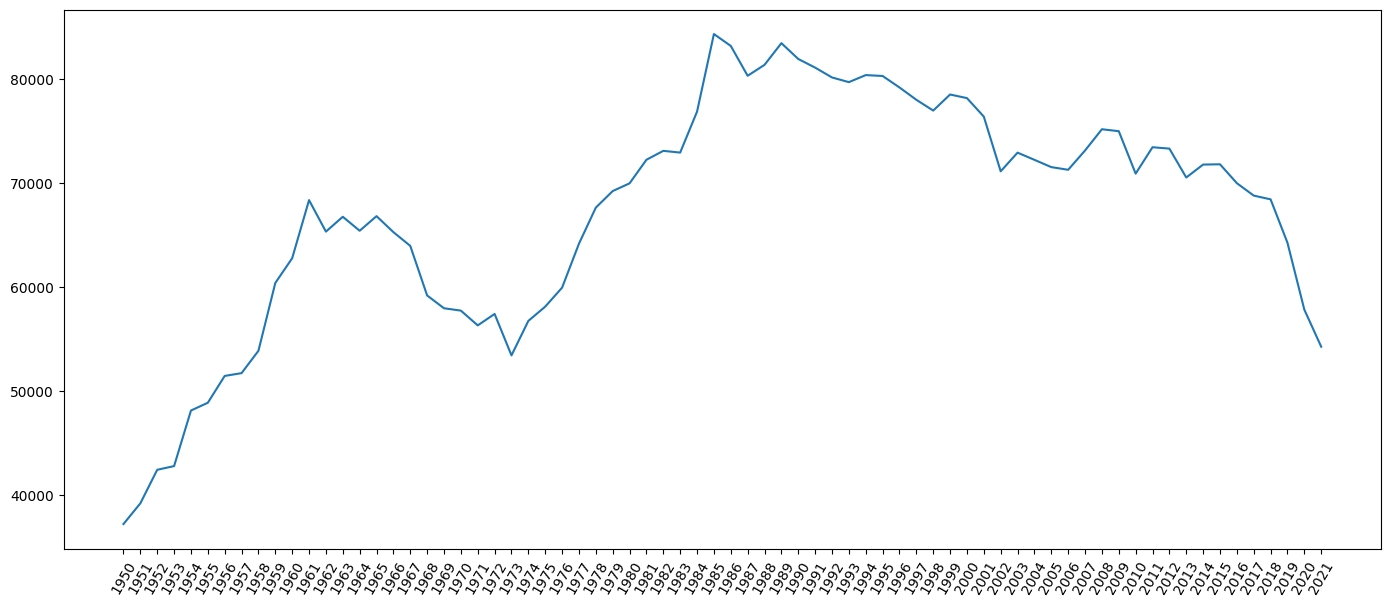

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(17,7))

nacimientos = df['Nacimientos']
anios = df['Año']
mapeado = range(len(anios))


plt.plot(nacimientos)
plt.xticks(mapeado,anios, rotation=60)
plt.show()

### **Gráfico de barras: Comparación de nacimientos y defunciones**

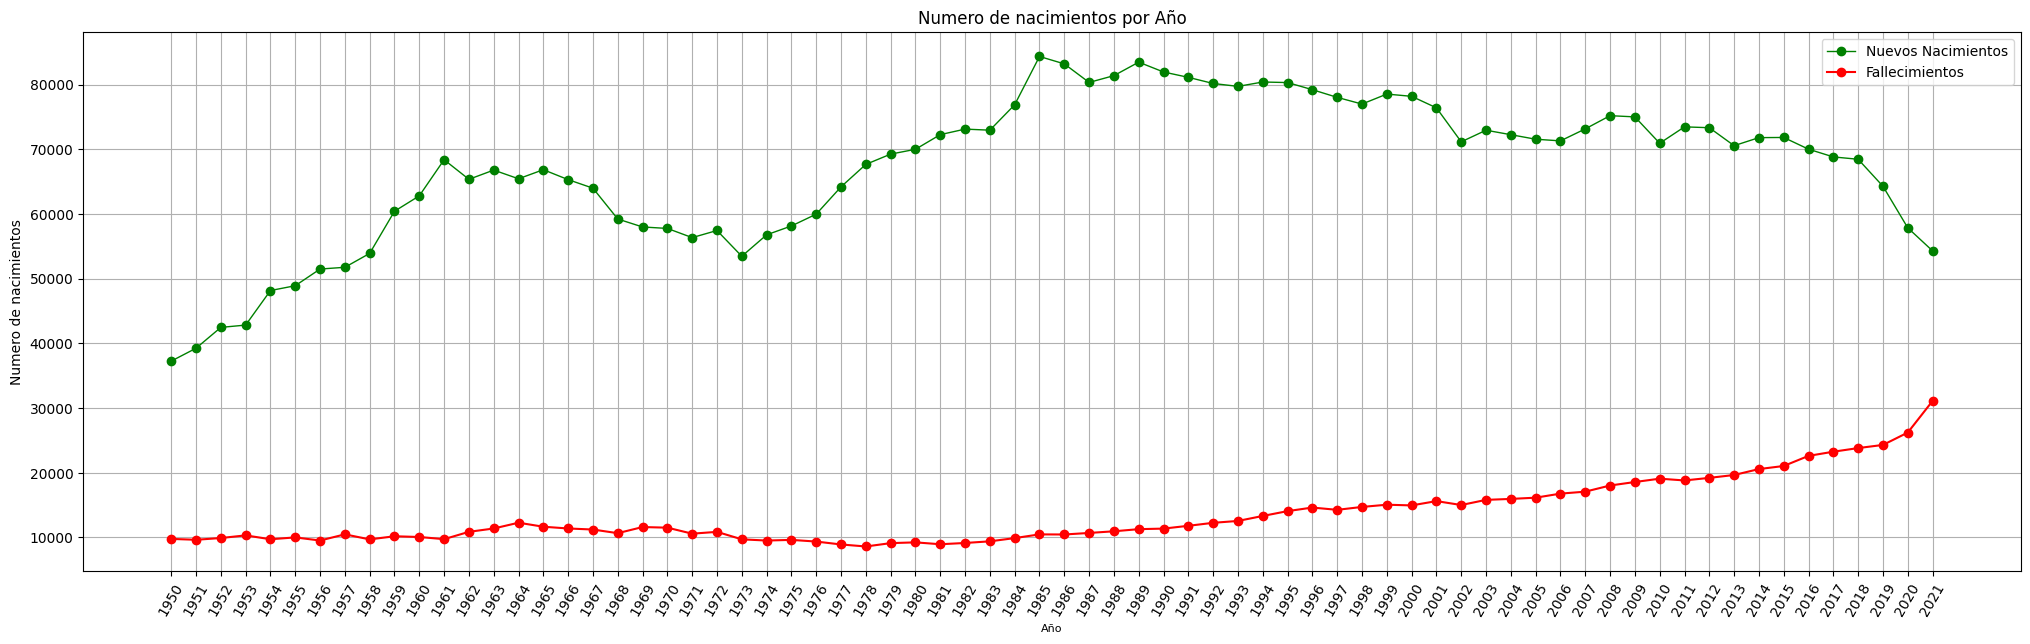

In [93]:
# Crear gráfiimport matplotlib.pyplot as plt

import matplotlib.pyplot as plt


#Crear un figura y dimensionarla


plt.figure(figsize=(25,7))


nacimientos = df['Nacimientos']  #Datos


defunciones= df['Defunciones']


anios = df['Año'] #Eje X
mapeado = range(len(anios)) #mapeado



plt.plot(nacimientos, color='green', marker = 'o',label = 'Nuevos Nacimientos', linewidth=1)          # Añadimos el gráfico
plt.plot(defunciones, color='red', marker = 'o', label='Fallecimientos')
plt.xticks(mapeado, anios, rotation=60)  # Mapeamos los valores horizontales
plt.grid()


plt.legend()
#Adignar un titulo
plt.title('Numero de nacimientos por Año')


#Eje x
plt.xlabel('Año',fontsize=8)



#Eje Y
plt.ylabel('Numero de nacimientos')



plt.show()                  # Finalmente lo mostramos


In [94]:
# Filtrar datos del último año
ultimo_anio = df[df['Año'] == df['Año'].max()]

# Crear gráfico de barras



### **<mark>TAREA SEMANA 12</mark>**

**Objetivo:** Combinar la manipulación de datos con visualización.

#### **Enunciado:**

1. Filtra los datos desde el año 2000.
2. Calcula el promedio de nacimientos y defunciones desde esa fecha.
3. Crea un gráfico de líneas que compare nacimientos y defunciones desde el año 2000.

#### **Solución:**

1. **Filtrar datos desde el año 2000:**

In [51]:
#


2. **Calcular promedios:**

In [95]:
df['promedio'] = df['Nacimientos'] + df['Defunciones']
df

,Año,Nacimientos,Defunciones,Saldo Poblacional,Saldo porcentaje,promedio
0,1950,37248,9769,27479,7941,47017
1,1951,39239,9631,29608,715,48870
2,1952,42461,9902,32559,2853,52363
3,1953,42817,10312,32505,1569,53129
4,1954,48157,9713,38444,9305,57870
...,...,...,...,...,...,...
67,2017,68811,23246,45565,22319,92057
68,2018,68449,23806,44643,20837,92255
69,2019,64274,24292,39982,15690,88566
70,2020,57848,26205,31643,5438,84053


3. **Graficar:**

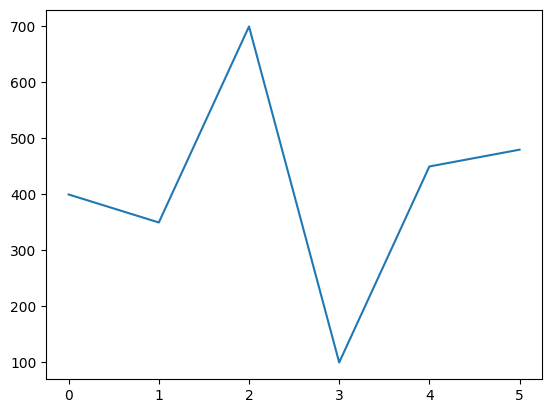

In [53]:
import numpy as np
import matplotlib.pyplot as plt
#carlos
ahorros = [400, 350, 700, 100, 450, 480]
#ahorros = np.random.randint(100, size=[6])
meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio']
mapeado = range(len(meses))

plt.plot(ahorros)
plt.show()